In [1]:
# Import libraries
import pandas as pd
import numpy as np
import PyAstronomy as pyAst
import math

In [2]:
# Import csv file
ngc2264 = pd.read_csv("NGC 2264 Errors 2.csv")
ngc2264.head()

,source_id,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,ruwe,...,has_epoch_rv,has_mcmc_gspphot,has_mcmc_msc,teff_gspphot,logg_gspphot,mh_gspphot,distance_gspphot,azero_gspphot,ag_gspphot,ebpminrp_gspphot
0,3331309439465931392,96.489774,11.906128,0.789885,0.027804,1.795118,0.029343,-0.694668,0.023393,1.025435,...,False,True,True,6606.643,4.0540,-0.5472,1205.4524,1.8434,1.5130,0.8281
1,3328096249875652096,98.011506,11.314292,0.174109,0.030824,0.069170,0.029533,-0.176040,0.024049,1.006570,...,False,True,True,15038.883,4.0570,-0.7857,2477.0388,3.9801,3.3942,1.8691
2,3159162885336461184,104.081161,11.244076,2.285176,0.522906,1.691088,0.780854,4.351795,0.593007,26.587984,...,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3351518188305996288,103.284055,12.427482,0.593969,0.025481,-1.026084,0.026357,-1.818609,0.024001,1.012829,...,False,True,True,7255.777,4.3911,-0.5364,1299.5569,0.7221,0.6327,0.3420
4,3158287433564468992,102.584921,9.484979,0.642109,0.019411,-2.262816,0.022747,4.657354,0.020723,1.034468,...,False,False,True,6612.249,3.9015,-0.4419,1598.6108,0.7424,0.6330,0.3429


In [3]:
ngc2264vel = ngc2264[["source_id", "ra", "dec", 'parallax', 'pmra', 'pmdec', 'radial_velocity', 'parallax_error', 'pmra_error', 'pmdec_error', 'radial_velocity_error']]

ngc2264vel = ngc2264vel.dropna()
#ngc2264vel
ngc2264vel.shape

(1985, 11)

In [4]:
# Determine the mean and standard deviation, max, min, range
parallax_mean = ngc2264vel['parallax'].mean()
parallax_std = ngc2264vel['parallax'].std()
parallax_min = ngc2264vel['parallax'].min()
parallax_max = ngc2264vel['parallax'].max()
parallax_range = parallax_max - parallax_min

pmra_mean = ngc2264vel['pmra'].mean()
pmra_std = ngc2264vel['pmra'].std()
pmra_min = ngc2264vel['pmra'].min()
pmra_max = ngc2264vel['pmra'].max()
pmra_range = pmra_max - pmra_min 

pmdec_mean = ngc2264vel['pmdec'].mean()
pmdec_std = ngc2264vel['pmdec'].std()
pmdec_min = ngc2264vel['pmdec'].min()
pmdec_max = ngc2264vel['pmdec'].max()
pmdec_range = pmdec_max - pmdec_min

radial_vel_mean = ngc2264vel['radial_velocity'].mean()
radial_vel_std = ngc2264vel['radial_velocity'].std()
radial_vel_min = ngc2264vel['radial_velocity'].min()
radial_vel_max = ngc2264vel['radial_velocity'].max()
radial_vel_range = radial_vel_max - radial_vel_min

stats_ngc2264 = pd.DataFrame({'parallax': [parallax_mean, parallax_std, parallax_min, parallax_max, parallax_range], 
                              'pmra': [pmra_mean, pmra_std, pmra_min, pmra_max, pmra_range],
                              'pmdec': [pmdec_mean, pmdec_std, pmdec_min, pmdec_max, pmdec_range],
                              'radial_velocity': [radial_vel_mean, radial_vel_std, radial_vel_min, radial_vel_max, radial_vel_range]}).rename(index={0: 'mean', 1: 'std', 2: 'min', 3: 'max', 4: 'range'})
stats_ngc2264


,parallax,pmra,pmdec,radial_velocity
mean,1.665552,3.891850,-13.887708,-58.846754
std,1.943220,12.787308,23.240412,37.143766
min,-2.407317,-95.414793,-437.326131,-648.350400
max,30.795021,179.980242,20.061752,-37.120600
range,33.202337,275.395035,457.387882,611.229800


In [5]:
# Calculate z-scores
ngc2264vel['parallax_z_score'] = ngc2264vel.apply(lambda x: (x['parallax']-parallax_mean)/parallax_std, axis=1)
ngc2264vel['pmra_z_score'] = ngc2264vel.apply(lambda x: (x['pmra']-pmra_mean)/pmra_std, axis=1)
ngc2264vel['pmdec_z_score'] = ngc2264vel.apply(lambda x: (x['pmdec']-pmdec_mean)/pmdec_std, axis=1)
ngc2264vel['radial_vel_z_score'] = ngc2264vel.apply(lambda x: (x['radial_velocity']-radial_vel_mean)/radial_vel_std, axis=1)

ngc2264vel

,source_id,ra,dec,parallax,pmra,pmdec,radial_velocity,parallax_error,pmra_error,pmdec_error,radial_velocity_error,parallax_z_score,pmra_z_score,pmdec_z_score,radial_vel_z_score
0,3331309439465931392,96.489774,11.906128,0.789885,1.795118,-0.694668,-648.350400,0.027804,0.029343,0.023393,13.319536,-0.450627,-0.163970,0.567677,-15.870864
1,3328096249875652096,98.011506,11.314292,0.174109,0.069170,-0.176040,-574.459900,0.030824,0.029533,0.024049,13.216003,-0.767511,-0.298943,0.589992,-13.881553
2,3159162885336461184,104.081161,11.244076,2.285176,1.691088,4.351795,-538.211300,0.522906,0.780854,0.593007,13.764878,0.318864,-0.172105,0.784818,-12.905653
3,3351518188305996288,103.284055,12.427482,0.593969,-1.026084,-1.818609,-470.373170,0.025481,0.026357,0.024001,21.149775,-0.551447,-0.384595,0.519315,-11.079286
4,3158287433564468992,102.584921,9.484979,0.642109,-2.262816,4.657354,-429.951000,0.019411,0.022747,0.020723,6.161143,-0.526674,-0.481311,0.797966,-9.991024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3353015482623867904,103.770321,12.670198,2.508450,-1.082237,-32.318662,-37.169870,0.020534,0.021803,0.019622,6.009993,0.433764,-0.388986,-0.793056,0.583594
1996,3134385017146604928,101.195681,8.660348,1.424245,13.539624,-6.070139,-37.161552,0.014830,0.017186,0.016074,2.380904,-0.124179,0.754480,0.336378,0.583818
1997,3133092266349071616,103.459988,7.633070,1.379561,9.032885,-19.615316,-37.153553,0.026362,0.030728,0.022231,4.407648,-0.147174,0.402042,-0.246450,0.584033
1998,3355679255702209664,98.042302,13.671726,1.073066,7.673501,-9.021655,-37.127453,0.023451,0.020717,0.017500,0.135235,-0.304899,0.295735,0.209379,0.584736


In [6]:
# Determine outliers(z-scores > 2)
ngc2264vel['parallax_outlier'] = ngc2264vel.apply(lambda x: True if abs(x['parallax_z_score']) > 2 else False, axis=1)
ngc2264vel['pmra_outlier'] = ngc2264vel.apply(lambda x: True if abs(x['pmra_z_score']) > 2 else False, axis=1)
ngc2264vel['pmdec_outlier'] = ngc2264vel.apply(lambda x: True if abs(x['pmdec_z_score']) > 2 else False, axis=1)
ngc2264vel['radial_vel_outlier'] = ngc2264vel.apply(lambda x: True if abs(x['radial_vel_z_score']) > 2 else False, axis=1)



In [7]:


outliers  = pd.DataFrame({'parallax': ngc2264vel['parallax_outlier'].value_counts().tolist(),
                         'pmra': ngc2264vel['pmra_outlier'].value_counts().tolist(),
                         'pmdec': ngc2264vel['pmdec_outlier'].value_counts().tolist(),
                         'radial_vel': ngc2264vel['radial_vel_outlier'].value_counts().tolist()}).rename(index={0: 'not outlier', 1: 'outlier'})
outliers

,parallax,pmra,pmdec,radial_vel
not outlier,1917,1922,1925,1927
outlier,68,63,60,58


In [8]:
def space_velocity_UVW(ra, dec, parallax, pm_dec, pm_ra, radial_vel):
    rads = np.pi/180
    # Matrix T Coordinates
    T = np.array([-0.06699, -0.87276, -0.48354, 0.49273, -0.45035, 0.74458, -0.86760, -0.18837, 0.46020]).reshape(3, 3)
    
    # Matrix A
    A = np.array([np.cos(ra*rads)*np.cos(dec*rads), -np.sin(ra*rads), -np.cos(ra*rads)*np.sin(dec*rads),
                 np.sin(ra*rads)*np.cos(dec*rads), np.cos(ra*rads), -np.sin(ra*rads)*np.sin(dec*rads),
                 np.sin(dec*rads), 0, np.cos(dec*rads)]).reshape(3,3)
    
    B = np.matmul(T, A)
    k = 4.74057
    u = np.array([radial_vel, k*pm_ra/parallax, k*pm_dec/parallax])
    UVW = np.matmul(B, u)
    return UVW

def space_velocity_UVW_errors(ra, dec, parallax, pm_dec, pm_ra, radial_vel, parallax_err, pm_dec_err, pm_ra_err, radial_vel_err):
    rads = np.pi/180
    # Matrix T Coordinates
    T = np.array([-0.06699, -0.87276, -0.48354, 0.49273, -0.45035, 0.74458, -0.86760, -0.18837, 0.46020]).reshape(3, 3)
    
    # Matrix A
    A = np.array([np.cos(ra*rads)*np.cos(dec*rads), -np.sin(ra*rads), -np.cos(ra*rads)*np.sin(dec*rads),
                 np.sin(ra*rads)*np.cos(dec*rads), np.cos(ra*rads), -np.sin(ra*rads)*np.sin(dec*rads),
                 np.sin(dec*rads), 0, np.cos(dec*rads)]).reshape(3,3)
    
    B = np.matmul(T, A)
    C = np.power(B, 2)
    k = 4.74057
    u = np.array([radial_vel_err**2, (k/parallax)*(k/parallax)*(pm_ra_err**2+(pm_ra*parallax_err/parallax)**2), (k/parallax)**2*(pm_dec_err**2+(pm_dec*parallax_err/parallax)**2)]) 
    

    UVWerr = np.dot(C,u) + (2*pm_ra*pm_dec*k*k*parallax_err**2/parallax**4)*np.array([B[0][1]*B[0][2], B[1][1]*B[1][2], B[2][1]*B[2][2]])
    return UVWerr

ngc2264vel['U'] = ngc2264vel.apply(lambda x: space_velocity_UVW(x['ra'], x['dec'], x['parallax']/1000, x['pmdec']/1000, x['pmra']/1000, x['radial_velocity'])[0], axis=1)
ngc2264vel['V'] = ngc2264vel.apply(lambda x: space_velocity_UVW(x['ra'], x['dec'], x['parallax']/1000, x['pmdec']/1000, x['pmra']/1000, x['radial_velocity'])[1], axis=1)
ngc2264vel['W'] = ngc2264vel.apply(lambda x: space_velocity_UVW(x['ra'], x['dec'], x['parallax']/1000, x['pmdec']/1000, x['pmra']/1000, x['radial_velocity'])[2], axis=1)

ngc2264vel['Uerr'] = ngc2264vel.apply(lambda x: np.sqrt(space_velocity_UVW_errors(x['ra'], x['dec'], x['parallax']/1000, x['pmdec']/1000, x['pmra']/1000, x['radial_velocity'],
                                                                   x['parallax_error'], x['pmdec_error'], x['pmra_error'], x['radial_velocity_error'])[0]), axis=1)
ngc2264vel['Verr'] = ngc2264vel.apply(lambda x: np.sqrt(space_velocity_UVW_errors(x['ra'], x['dec'], x['parallax']/1000, x['pmdec']/1000, x['pmra']/1000, x['radial_velocity'],
                                                                   x['parallax_error'], x['pmdec_error'], x['pmra_error'], x['radial_velocity_error'])[1]), axis=1)
ngc2264vel['Werr'] = ngc2264vel.apply(lambda x: np.sqrt(space_velocity_UVW_errors(x['ra'], x['dec'], x['parallax']/1000, x['pmdec']/1000, x['pmra']/1000, x['radial_velocity'],
                                                                   x['parallax_error'], x['pmdec_error'], x['pmra_error'], x['radial_velocity_error'])[2]), axis=1)

ngc2264vel

,source_id,ra,dec,parallax,pmra,pmdec,radial_velocity,parallax_error,pmra_error,pmdec_error,...,parallax_outlier,pmra_outlier,pmdec_outlier,radial_vel_outlier,U,V,W,Uerr,Verr,Werr
0,3331309439465931392,96.489774,11.906128,0.789885,1.795118,-0.694668,-648.350400,0.027804,0.029343,0.023393,...,False,False,False,True,613.021191,211.411372,2.532406,118.224161,320.755724,315.270221
1,3328096249875652096,98.011506,11.314292,0.174109,0.069170,-0.176040,-574.459900,0.030824,0.029533,0.024049,...,False,False,False,True,537.884032,201.186285,-15.464218,409.128899,1063.207948,780.367548
2,3159162885336461184,104.081161,11.244076,2.285176,1.691088,4.351795,-538.211300,0.522906,0.780854,0.593007,...,False,False,False,True,487.164035,222.010082,-56.135925,726.824289,1867.178513,2243.815620
3,3351518188305996288,103.284055,12.427482,0.593969,-1.026084,-1.818609,-470.373170,0.025481,0.026357,0.024001,...,False,False,False,True,434.125646,168.773278,-67.688499,120.632262,433.868081,624.285094
4,3158287433564468992,102.584921,9.484979,0.642109,-2.262816,4.657354,-429.951000,0.019411,0.022747,0.020723,...,False,False,False,True,373.366910,213.911722,-34.061940,486.106222,1059.844808,165.958655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3353015482623867904,103.770321,12.670198,2.508450,-1.082237,-32.318662,-37.169870,0.020534,0.021803,0.019622,...,False,False,False,False,51.218410,-36.995479,-33.529066,141.058653,419.282313,240.132376
1996,3134385017146604928,101.195681,8.660348,1.424245,13.539624,-6.070139,-37.161552,0.014830,0.017186,0.016074,...,False,False,False,False,51.372432,-18.771377,28.786913,185.668391,361.041478,325.233579
1997,3133092266349071616,103.459988,7.633070,1.379561,9.032885,-19.615316,-37.153553,0.026362,0.030728,0.022231,...,False,False,False,False,66.239991,-49.634126,-5.986927,635.146165,1269.267249,115.443984
1998,3355679255702209664,98.042302,13.671726,1.073066,7.673501,-9.021655,-37.127453,0.023451,0.020717,0.017500,...,False,False,False,False,52.141927,-36.048617,9.891530,373.834586,1053.687889,268.130244


In [9]:
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy import units as u
from sys import stdin
def parse_parallax(x):
	if x == '' or float(x) <= 0:
		return 0
	elif float(x) != '' and float(x) > 0:
		return 1/float(x)
	else:
		return math.inf

def change_cartesian(RA, DEC, Dist):
	# Convert arcseconds to rad
	arc2Rad = np.pi/(3600*180)
	
	celesx = Dist*np.sin(np.pi/2 - DEC*arc2Rad)*np.cos(RA*arc2Rad)
	celesy = Dist*np.sin(np.pi/2 - DEC*arc2Rad)*np.sin(RA*arc2Rad)
	celesz = Dist*np.cos(np.pi/2 - DEC*arc2Rad)

	return [celesx, celesy, celesz]

def galactic_longlat(RA, DEC):
	# Get the galactic
	c = SkyCoord(ra=RA*u.arcsecond, dec=DEC*u.arcsecond)
	c = c.galactic
	lGal = c.l.value
	bGal = c.b.value

	return [lGal, bGal]


def str_to_numbers(x):
	RA = x * 3600 *15 #arcseconds
	#RA = (int(x[0:2]) + int(x[2:4])/60 + float(x[4:8])/3600) * 15 # degrees
	return RA

def str_to_numbers2(y):
	return y*3600 
		#return int(x[1:3]) + int(x[3:5])/60 + int(x[5:7]/3600)

def plot_3D(df):
	color_dict = {"O": 'blue', "B": 'blue', "A": 'blue', "F": 'yellow', "G": 'yellow', "K": 'red', "M": 'red'}
	fig = px.scatter_3d(df, x='Cartesian X', y='Cartesian Y', z='Cartesian Z', color="Spectral Code", color_discrete_map=color_dict,
		title="3D Plot of OBAFGKM Stars")
	return fig

def plot_2D(df):
	color_dict = {"O": 'blue', "B": 'blue', "A": 'blue', "F": 'yellow', "G": 'yellow', "K": 'red', "M": 'red'}

	fig1 = px.scatter(df, x='RA-DEC XProjXY', y='RA-DEC YProjXY', color="Spectral Code", color_discrete_map=color_dict, labels= {'RA-DEC XProjXY': 'x', 'RA-DEC YProjXY': 'y'}, title="XY Projection of Stars With Equatorial Coordinates")
	fig2 = px.scatter(df, x='RA-DEC XProjXZ', y='RA-DEC ZProjXZ', color="Spectral Code", color_discrete_map=color_dict, labels= {'RA-DEC XProjXZ': 'x', 'RA-DEC ZProjXZ': 'z'}, title="XZ Projection of Stars With Equatorial Coordinates")
	fig3 = px.scatter(df, x='RA-DEC YProjYZ', y='RA-DEC ZProjYZ', color="Spectral Code", color_discrete_map=color_dict, labels= {'RA-DEC YProjYZ': 'y', 'RA-DEC ZProjYZ': 'z'}, title="YZ Projection of Stars With Equatorial Coordinates")
	fig4 = px.scatter(df, x='Galactic XProjXY', y='Galactic YProjXY', color="Spectral Code", color_discrete_map=color_dict, labels= {'Galactic XProjXY': 'x', 'Galactic YProjXY': 'y'}, title="XY Projection of Stars With Galactic Coordinates")
	fig5 = px.scatter(df, x='Galactic XProjXZ', y='Galactic ZProjXZ', color="Spectral Code", color_discrete_map=color_dict, labels= {'Galactic XProjXZ': 'x', 'Galactic ZProjXZ': 'z'}, title="XZ Projection of Stars With Galactic Coordinates")
	fig6 = px.scatter(df, x='Galactic YProjYZ', y='Galactic ZProjYZ', color="Spectral Code", color_discrete_map=color_dict, labels= {'Galactic YProjYZ': 'y', 'Galactic ZProjYZ': 'z'}, title="YZ Projection of Stars With Galactic Coordinates")
	return [fig1, fig2, fig3, fig4, fig5, fig6]

def Coord_Proj(val1, val2, ind):
	arc2Rad = np.pi/(3600*180) # Conversion to radians from arcsecond
	deg2Rad = np.pi/180
	
	if ind == 'RA_DEC':
		phi = val1*arc2Rad
		lambdA = val2*arc2Rad
	elif ind == 'Galactic':
		phi = val1*deg2Rad
		lambdA = val2*deg2Rad
	
	x_proj = (2*np.sqrt(2)*np.cos(phi)*np.sin(lambdA/2)) / (np.sqrt(1+np.cos(phi)*np.cos(lambdA/2)))
	y_proj = (np.sqrt(2)*np.sin(phi)) / (np.sqrt(1+np.cos(phi)*np.cos(lambdA/2)))
	z_proj = np.sqrt(1-(0.25*x_proj)**2-(0.5*y_proj)**2)

	return [x_proj, y_proj, z_proj]

def RA_Proj(RA, DEC):
	#xy projection (scale axes using plotly window size)
	arc2Rad = np.pi/(3600*180)
	phi = DEC*arc2Rad
	lam = -1*RA*arc2Rad
	productVal = np.sqrt(2/(1+np.sin(phi)))
	xProjxy= productVal*np.cos(phi)*np.cos(lam)
	yProjxy = productVal*np.cos(phi)*np.sin(lam)

	#yz projection (scale axes using plotly window size)
	phi = DEC*arc2Rad
	lam = -1*RA*arc2Rad
	productVal = np.sqrt(2/(1+np.cos(phi)*np.cos(lam)))
	yProjyz= productVal*np.cos(phi)*np.sin(lam)
	zProjyz = productVal*np.sin(phi)

	#xz projection (scale axes using plotly window size)
	phi = DEC* arc2Rad
	lam = -1*RA*arc2Rad-np.pi/2
	productVal = np.sqrt(2/(1+np.cos(phi)*np.cos(lam)))
	xProjxz=productVal*np.cos(phi)*np.sin(lam)
	zProjxz = productVal*np.sin(phi)
	return [xProjxy, yProjxy, yProjyz, zProjyz, xProjxz, zProjxz]

def Galactic_Proj(lat, lon):
	 #galactic projections
			#xy
	deg2Rad = np.pi/180
	phi = lat *deg2Rad
	lam = lon*deg2Rad
	productVal = np.sqrt(2/(1+np.sin(phi)))
	xProjGxy= productVal*np.cos(phi)*np.cos(lam)
	yProjGxy = productVal*np.cos(phi)*np.sin(lam)
			#yz
	phi = lat*deg2Rad
	lam = lon*deg2Rad
	productVal = np.sqrt(2/(1+np.cos(phi)*np.cos(lam)))
	yProjGyz= productVal*np.cos(phi)*np.sin(lam)
	zProjGyz = productVal*np.sin(phi)
			#xz
	phi = lat* deg2Rad
	lam = lon*deg2Rad-np.pi/2
	productVal = np.sqrt(2/(1+np.cos(phi)*np.cos(lam)))
	xProjGxz=productVal*np.cos(phi)*np.sin(lam)
	zProjGxz = productVal*np.sin(phi)
	return [xProjGxy, yProjGxy, yProjGyz, zProjGyz, xProjGxz, zProjGxz]

ngc2264 = pd.read_csv("NGC 2264 Errors 2.csv")
ngc2264.head()


ngc2264vel = ngc2264vel.rename(columns={"ra":"RA", "dec":"DE", "parallax":"Parallax"})

# Option to see all the columns
pd.set_option('display.max_columns', None)

astro_df = ngc2264vel 

# Removing rows with 0 values
astro_df = astro_df[astro_df.RA != '']
astro_df = astro_df[astro_df.DE != '']
astro_df = astro_df[astro_df.Parallax != '']
astro_df = astro_df[astro_df.Parallax != 0]
astro_df['Distance'] = astro_df['Parallax'].apply(parse_parallax)
astro_df = astro_df[astro_df.Distance != math.inf]

# Parse the strings of RA and DE into arcseconds
astro_df['RA_sc'] = astro_df.apply(lambda row: str_to_numbers(row['RA']), axis=1)
astro_df['DE_sc'] = astro_df.apply(lambda row: str_to_numbers2(row['DE']), axis=1)


astro_df['Galactic Longitude/Latitude'] = astro_df.apply(lambda row: galactic_longlat(row['RA_sc'], row['DE_sc']), axis=1)
astro_df['Galactic Longitude'] = astro_df.apply(lambda row: row['Galactic Longitude/Latitude'][0], axis=1)
astro_df['Galactic Latitude'] = astro_df.apply(lambda row: row['Galactic Longitude/Latitude'][1], axis=1)
astro_df['Cartesian'] = astro_df.apply(lambda row: change_cartesian(row['RA_sc'], row['DE_sc'], row['Distance']), axis=1)
astro_df['Cartesian X'] = astro_df.apply(lambda row: row['Cartesian'][0], axis=1)
astro_df['Cartesian Y'] = astro_df.apply(lambda row: row['Cartesian'][1], axis=1)
astro_df['Cartesian Z'] = astro_df.apply(lambda row: row['Cartesian'][2], axis=1)
astro_df = astro_df.drop('Cartesian', axis=1)
astro_df = astro_df.drop('Galactic Longitude/Latitude', axis=1)


# 2-D Projection using RA-DEC
#astro_df['RA-DEC Projection'] = astro_df.apply(lambda row: Coord_Proj(row['DE_sc'], row['RA_sc'], 'RA_DEC'), axis=1)
#astro_df['RA-DEC ProjectionX'] = astro_df.apply(lambda row: row['RA-DEC Projection'][0], axis=1)
#astro_df['RA-DEC ProjectionY'] = astro_df.apply(lambda row: row['RA-DEC Projection'][1], axis=1)
#astro_df['RA-DEC ProjectionZ'] = astro_df.apply(lambda row: row['RA-DEC Projection'][2], axis=1)
astro_df['RA-DEC Projection'] = astro_df.apply(lambda row: RA_Proj(row['RA_sc'], row['DE_sc']), axis=1)
astro_df['RA-DEC XProjXY'] = astro_df.apply(lambda row: row['RA-DEC Projection'][0], axis=1)
astro_df['RA-DEC YProjXY'] = astro_df.apply(lambda row: row['RA-DEC Projection'][1], axis=1)
astro_df['RA-DEC YProjYZ'] = astro_df.apply(lambda row: row['RA-DEC Projection'][2], axis=1)
astro_df['RA-DEC ZProjYZ'] = astro_df.apply(lambda row: row['RA-DEC Projection'][3], axis=1)
astro_df['RA-DEC XProjXZ'] = astro_df.apply(lambda row: row['RA-DEC Projection'][4], axis=1)
astro_df['RA-DEC ZProjXZ'] = astro_df.apply(lambda row: row['RA-DEC Projection'][5], axis=1)
astro_df = astro_df.drop('RA-DEC Projection', axis=1)

# 2-D Projection using Galactic Coordinates
#astro_df['Galactic Projection'] = astro_df.apply(lambda row: Coord_Proj(row['Galactic Latitude'], row['Galactic Longitude'], 'Galactic'), axis=1)
#astro_df['Galactic ProjectionX'] = astro_df.apply(lambda row: row['Galactic Projection'][0], axis=1)
#astro_df['Galactic ProjectionY'] = astro_df.apply(lambda row: row['Galactic Projection'][1], axis=1)
#astro_df['Galactic ProjectionZ'] = astro_df.apply(lambda row: row['Galactic Projection'][2], axis=1)
astro_df['Galactic Projection'] = astro_df.apply(lambda row: Galactic_Proj(row['Galactic Latitude'], row['Galactic Longitude']), axis=1)
astro_df['Galactic XProjXY'] = astro_df.apply(lambda row: row['Galactic Projection'][0], axis=1)
astro_df['Galactic YProjXY'] = astro_df.apply(lambda row: row['Galactic Projection'][1], axis=1)
astro_df['Galactic YProjYZ'] = astro_df.apply(lambda row: row['Galactic Projection'][2], axis=1)
astro_df['Galactic ZProjYZ'] = astro_df.apply(lambda row: row['Galactic Projection'][3], axis=1)
astro_df['Galactic XProjXZ'] = astro_df.apply(lambda row: row['Galactic Projection'][4], axis=1)
astro_df['Galactic ZProjXZ'] = astro_df.apply(lambda row: row['Galactic Projection'][5], axis=1)
astro_df = astro_df.drop('Galactic Projection', axis=1)
astro_df

,source_id,RA,DE,Parallax,pmra,pmdec,radial_velocity,parallax_error,pmra_error,pmdec_error,radial_velocity_error,parallax_z_score,pmra_z_score,pmdec_z_score,radial_vel_z_score,parallax_outlier,pmra_outlier,pmdec_outlier,radial_vel_outlier,U,V,W,Uerr,Verr,Werr,Distance,RA_sc,DE_sc,Galactic Longitude,Galactic Latitude,Cartesian X,Cartesian Y,Cartesian Z,RA-DEC XProjXY,RA-DEC YProjXY,RA-DEC YProjYZ,RA-DEC ZProjYZ,RA-DEC XProjXZ,RA-DEC ZProjXZ,Galactic XProjXY,Galactic YProjXY,Galactic YProjYZ,Galactic ZProjYZ,Galactic XProjXZ,Galactic ZProjXZ
0,3331309439465931392,96.489774,11.906128,0.789885,1.795118,-0.694668,-648.350400,0.027804,0.029343,0.023393,13.319536,-0.450627,-0.163970,0.567677,-15.870864,False,False,False,True,613.021191,211.411372,2.532406,118.224161,320.755724,315.270221,1.266007,5.210448e+06,42862.062116,114.415084,-50.600603,1.228602,0.158404,0.261188,1.249571,-0.161107,-0.126055,0.207850,-1.467290,0.311931,-0.778304,1.714562,0.951682,-1.272407,0.295367,-0.869962
1,3328096249875652096,98.011506,11.314292,0.174109,0.069170,-0.176040,-574.459900,0.030824,0.029533,0.024049,13.216003,-0.767511,-0.298943,0.589992,-13.881553,False,False,False,True,537.884032,201.186285,-15.464218,409.128899,1063.207948,780.367548,5.743516,5.292621e+06,40731.451411,148.812728,-48.046934,4.868859,2.830627,1.126825,1.096135,-0.637264,-0.512746,0.204116,-1.683416,0.389601,-1.597568,0.967037,0.748263,-1.607456,0.697088,-0.906476
2,3159162885336461184,104.081161,11.244076,2.285176,1.691088,4.351795,-538.211300,0.522906,0.780854,0.593007,13.764878,0.318864,-0.172105,0.784818,-12.905653,False,False,False,True,487.164035,222.010082,-56.135925,726.824289,1867.178513,2243.815620,0.437603,5.620383e+06,40478.674614,210.921235,21.335917,-0.222451,0.367058,0.085328,-0.657637,-1.085143,-1.691749,0.393271,1.790499,0.686801,-0.967662,-0.579621,-1.510121,1.147907,1.565078,0.712609
3,3351518188305996288,103.284055,12.427482,0.593969,-1.026084,-1.818609,-470.373170,0.025481,0.026357,0.024001,21.149775,-0.551447,-0.384595,0.519315,-11.079286,False,False,False,True,434.125646,168.773278,-67.688499,120.632262,433.868081,624.285094,1.683588,5.577339e+06,44738.935090,204.614384,11.246555,-0.542351,1.552112,0.362315,-0.413271,-1.182709,-1.583552,0.369654,1.630251,1.089080,-1.153536,-0.528480,-1.755300,0.838016,1.639636,0.358630
4,3158287433564468992,102.584921,9.484979,0.642109,-2.262816,4.657354,-429.951000,0.019411,0.022747,0.020723,6.161143,-0.526674,-0.481311,0.797966,-9.991024,False,False,False,True,373.366910,213.911722,-34.061940,486.106222,1059.844808,165.958655,1.557369,5.539586e+06,34145.924265,202.636818,0.721845,-0.234304,1.518103,0.256637,-0.197142,-1.277324,-1.495650,0.252842,1.339960,1.467679,-1.297019,-0.540875,-1.960016,0.064161,1.664091,0.022716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3353015482623867904,103.770321,12.670198,2.508450,-1.082237,-32.318662,-37.169870,0.020534,0.021803,0.019622,6.009993,0.433764,-0.388986,-0.793056,0.583594,False,False,False,False,51.218410,-36.995479,-33.529066,141.058653,419.282313,240.132376,0.398653,5.603597e+06,45612.714485,207.515410,17.794057,-0.173879,0.347914,0.087440,-0.558607,-1.117712,-1.643680,0.413100,1.729005,0.869478,-1.045175,-0.544441,-1.577367,1.095824,1.595715,0.577465
1996,3134385017146604928,101.195681,8.660348,1.424245,13.539624,-6.070139,-37.161552,0.014830,0.017186,0.016074,2.380904,-0.124179,0.754480,0.336378,0.583818,False,False,False,False,51.372432,-18.771377,28.786913,185.668391,361.041478,325.233579,0.702126,5.464567e+06,31177.251833,193.063390,-17.585085,0.145083,0.678789,0.105724,0.272433,-1.274609,-1.244649,0.193859,-1.602878,1.168035,-1.572004,-0.364758,-1.140364,-1.598990,1.482646,-0.482382
1997,3133092266349071616,103.459988,7.633070,1.379561,9.032885,-19.615316,-37.153553,0.026362,0.030728,0.022231,4.407648,-0.147174,0.402042,-0.246

In [10]:
# Plotting space velocity vectors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
U, V, W = ngc2264vel['U'].tolist(), ngc2264vel['V'].tolist(), ngc2264vel['W'].tolist()
Uerr, Verr, Werr = ngc2264vel['Uerr'].tolist(), ngc2264vel['Verr'].tolist(), ngc2264vel['Werr'].tolist()
X, Y, Z = astro_df['Cartesian X'].tolist(), astro_df['Cartesian Y'].tolist(), astro_df['Cartesian Z'].tolist()

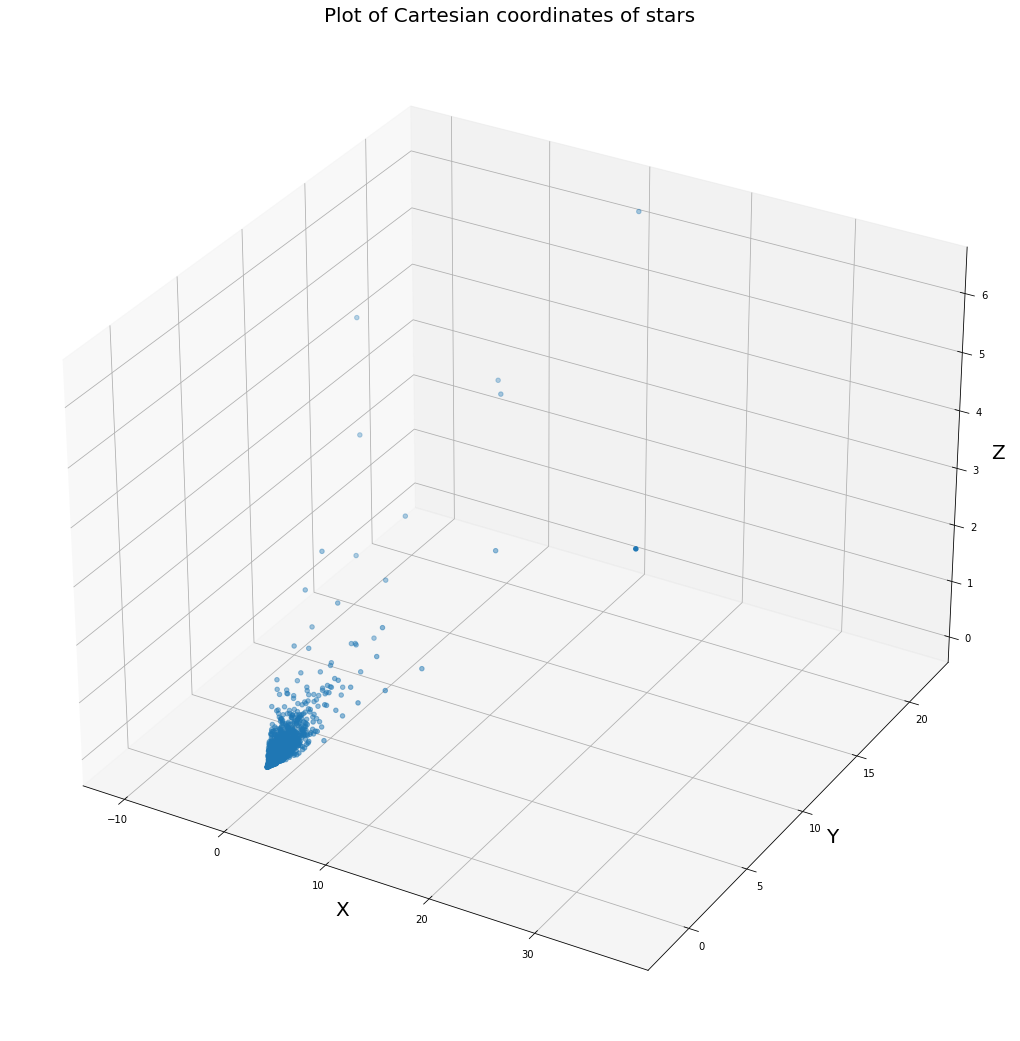

In [11]:
# Make the grid
fig = plt.figure()
fig.set_size_inches(18.5, 18.5, forward=True)
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z)
ax.set_xlabel('X', fontsize='20')
ax.set_ylabel('Y', fontsize='20')
ax.set_zlabel('Z', fontsize='20')
ax.set_title('Plot of Cartesian coordinates of stars', fontsize='20')
plt.show()
fig.savefig('space_pos.png')

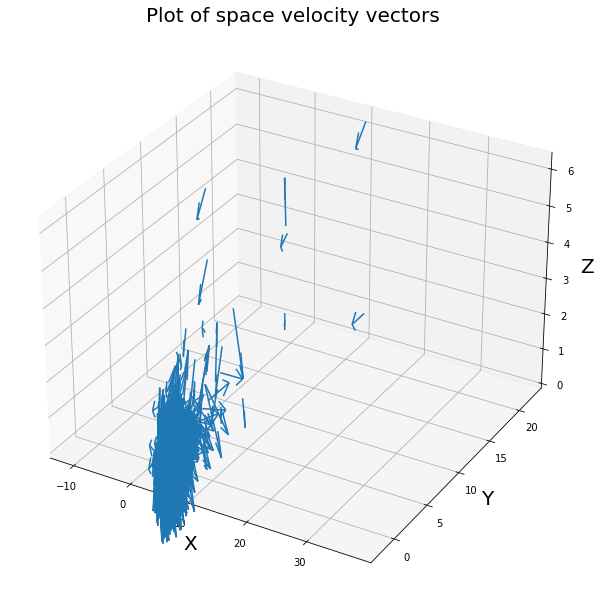

In [17]:
# Make the grid
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
ax = fig.add_subplot(projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=3, normalize=True)
ax.set_xlabel('X', fontsize='20')
ax.set_ylabel('Y', fontsize='20')
ax.set_zlabel('Z', fontsize='20')
ax.set_title('Plot of space velocity vectors', fontsize='20')
plt.show()
fig.savefig('space_vel.png')

In [18]:
sum(U), sum(V), sum(W)

(139072.40304027873, -31224.286031343112, -20906.825039900217)

In [19]:
ngc2264vel['UVW Velocity'] = ngc2264vel.apply(lambda x: math.sqrt(x['U']**2 + x['V']**2 + x['W']**2), axis=1)
ngc2264vel['UVW Velocity_z_score'] = ngc2264vel.apply(lambda x: (x['UVW Velocity']-ngc2264vel['UVW Velocity'].mean()) / ngc2264vel['UVW Velocity'].std(), axis=1)
ngc2264vel['UVW Velocity_outlier'] = ngc2264vel.apply(lambda x: True if abs(x['UVW Velocity_z_score']) > 2 else False, axis=1)
outliers  = pd.DataFrame({'parallax': ngc2264vel['parallax_outlier'].value_counts().tolist(),
                         'pmra': ngc2264vel['pmra_outlier'].value_counts().tolist(),
                         'pmdec': ngc2264vel['pmdec_outlier'].value_counts().tolist(),
                         'radial_vel': ngc2264vel['radial_vel_outlier'].value_counts().tolist(),
                         'space_vel': ngc2264vel['UVW Velocity_outlier'].value_counts().tolist()}).rename(index={0: 'not outlier', 1: 'outlier'})
outliers

,parallax,pmra,pmdec,radial_vel,space_vel
not outlier,1917,1922,1925,1927,1920
outlier,68,63,60,58,65


NameError: name 'it' is not defined

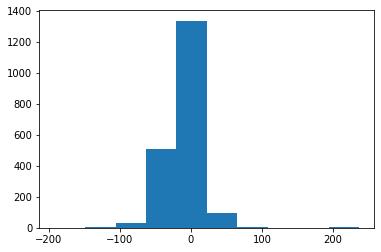

In [20]:
# Plot histogram of U, V, W space velocity vectors

plt.hist(W)
plt.title("Histogram of W Vector".format(it))
plt.xlabel("Data")
plt.ylabel("Frequency")
plt.savefig(it)


In [21]:
# Determining the LSR through log-max-likelihood
import scipy.optimize as opt
import scipy.stats as st
import scipy.special

def normal_logL(parms, data):
    n = len(data)
    mu, sigma = np.exp(parms)
    #logL = n*np.log(2*np.pi*(sigma**2))/2 + np.sum(((data-mu)**2)/(2 * (sigma**2)))
    logL = -n/2*np.log(2*np.pi)-n/2*np.log(sigma**2)-1/(2*sigma**2)*np.sum((data-mu)**2)
    return logL

def poisson_logL(parms, data):
    n = len(data)
    lambDa = np.exp(parms)
    #logL = n*np.log(2*np.pi*(sigma**2))/2 + np.sum(((data-mu)**2)/(2 * (sigma**2)))
    logL = -n*lambDa-np.sum(scipy.special.factorial(data))+np.log(lambDa)*np.sum(data)
    return logL

def normal_mle(data, mean_est, std_est):
    res = opt.minimize(
    fun=lambda log_params, data: -normal_logL(log_params, data),
    x0=np.array([3, 4]), args=(data,), method='L-BFGS-B')
    mu,sigma = np.exp(res.x)
    return mu, sigma

def poisson_mle(data):
    res = opt.minimize(
    fun=lambda log_params, data: -poisson_logL(log_params, data),
    x0=np.array([5]), args=(data,), method='L-BFGS-B')
    lambDa = np.exp(res.x)
    return lambDa


U_mu, U_sigma = normal_mle(U, np.mean(U), np.std(U))
V_mu, V_sigma = normal_mle(V, np.mean(V), np.std(V))
W_mu, W_sigma = normal_mle(W, np.mean(W), np.std(W))
X_lambda = poisson_mle(X)
Y_lambda = poisson_mle(Y)
Z_lambda = poisson_mle(Z)

print('Max Likelihood Method')
print('X:', X_lambda)
print('Y:', Y_lambda)
print('Z:', Z_lambda)
print('U:', U_mu, U_sigma)
print('V:', V_mu, V_sigma)
print('W:', W_mu, W_sigma)
print('Mean of Data')
print('U:', np.mean(U), np.std(U))
print('V:', np.mean(V), np.std(V))
print('W:', np.mean(W), np.std(W))

print('Cartesian Coordinates')
print('X:', np.mean(X), np.std(X))
print('Y:', np.mean(Y), np.std(Y))
print('Z:', np.mean(Z), np.std(Z))
    

Max Likelihood Method
X: [148.4131591]
Y: [148.4131591]
Z: [0.20276132]
U: 70.06163974290253 43.354122870516214
V: 7.231798272812827e-06 59.86161074538266
W: 4.213341152572355e-10 26.750876635453462
Mean of Data
U: 70.06166400014058 43.35410984458342
V: -15.730118907477664 57.75790225854354
W: -10.532405561662584 24.590197601487233
Cartesian Coordinates
X: 0.42566442648122904 1.2539294238230625
Y: 0.7826548827186894 1.2325711695896806
Z: 0.20276125110205287 0.3163279379425562


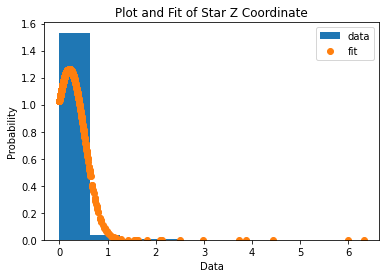

In [44]:
plt.hist(Z, density=True, label = 'data')
plt.plot(Z, st.norm.pdf(Z, np.mean(Z), np.std(Z)), 'o', label = 'fit')
plt.title('Plot and Fit of Star Z Coordinate')
plt.xlabel('Data')
plt.ylabel('Probability')
plt.legend()
plt.savefig("Zout.png")



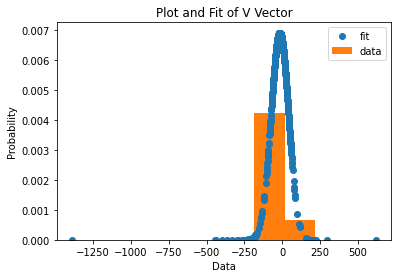

In [ ]:
# Plot estimation V
plt.plot(V, st.norm.pdf(V, np.mean(V), np.std(V)), 'o', label = 'fit')
plt.hist(V, density=True, label = 'data')
plt.title('Plot and Fit of V Vector')
plt.xlabel('Data')
plt.ylabel('Probability')
plt.legend()


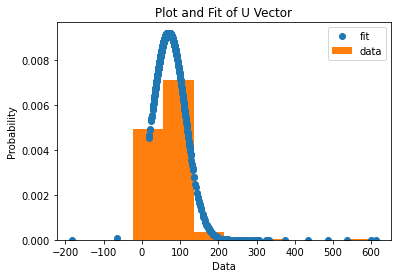

In [37]:
# Plot estimation U
plt.plot(U, st.norm.pdf(U, np.mean(U), np.std(U)), 'o', label = 'fit')
plt.hist(U, density=True, label = 'data')
plt.title('Plot and Fit of U Vector')
plt.xlabel('Data')
plt.ylabel('Probability')
plt.legend()
plt.savefig("Uout.png")


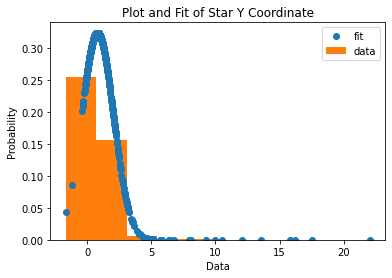

In [45]:
# Plot estimation Y
plt.plot(Y, st.norm.pdf(Y, np.mean(Y), np.std(Y)), 'o', label = 'fit')
plt.hist(Y, density=True, label = 'data')
plt.title('Plot and Fit of Star Y Coordinate')
plt.xlabel('Data')
plt.ylabel('Probability')
plt.legend()
plt.savefig("Yout.png")

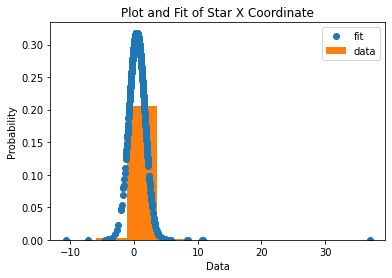

In [39]:
# Plot estimation X
plt.plot(X, st.norm.pdf(X, np.mean(X), np.std(X)), 'o', label = 'fit')
plt.hist(X, density=True, label = 'data')
plt.title('Plot and Fit of Star X Coordinate')
plt.xlabel('Data')
plt.ylabel('Probability')
plt.legend()
plt.savefig("Xout.png")


4481.318072091769

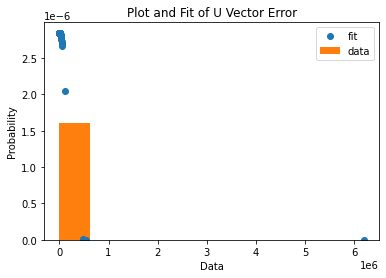

In [ ]:
# Plot estimation U errors
plt.plot(Uerr, st.norm.pdf(Uerr, np.mean(Uerr), np.std(Uerr)), 'o', label = 'fit')
plt.hist(Uerr, density=True, label = 'data')
plt.title('Plot and Fit of U Vector Error')
plt.xlabel('Data')
plt.ylabel('Probability')
plt.legend()

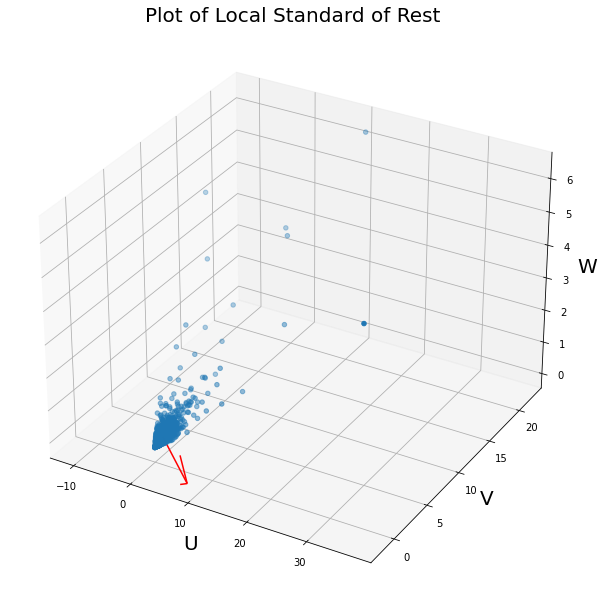

In [22]:
# Make the grid
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z)
ax.quiver(np.mean(X), np.mean(Y), np.mean(Z), np.mean(U), np.mean(V), np.mean(W), length=6, color='red', normalize=True)
ax.set_xlabel('X', fontsize='20')
ax.set_ylabel('Y', fontsize='20')
ax.set_zlabel('Z', fontsize='20')
ax.set_title('Plot of Local Standard of Rest', fontsize='20')
plt.show()
fig.savefig('space_vel_LSR.png')